In [1]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

https://towardsdatascience.com/stop-using-pandas-get-dummies-for-feature-encoding-5d2cd07cb4fc

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/#h2_5

https://www.youtube.com/watch?v=EItlUEPCIzM

https://www.datacamp.com/community/tutorials/k-means-clustering-python

https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1009824&gclid=CjwKCAiA1aiMBhAUEiwACw25MUbPKKtse7jriSObzy-AY5h-YRNG-hTwB8FaZDkxmGaQb3X8GoX2NxoCxNwQAvD_BwE

In [2]:
aisles = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/aisles.csv')
departments = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/departments.csv')
order_products_prior = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/order_products__prior.csv')
order_products_train = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/order_products__train.csv')
orders = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/orders.csv')
products = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/products.csv')

In [3]:

orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
order_products_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:

order_prior = pd.merge(order_products_prior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
221645,23391,13198,1,1,7,prior,17,0,10,28.0
221646,23391,42803,2,1,7,prior,17,0,10,28.0
221647,23391,8277,3,1,7,prior,17,0,10,28.0
221648,23391,37602,4,1,7,prior,17,0,10,28.0
221649,23391,40852,5,1,7,prior,17,0,10,28.0


In [7]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
_mt = pd.merge(order_products_prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [10]:
mt['product_name'].value_counts()[0:10]

Banana                    8919
Bag of Organic Bananas    7143
Organic Strawberries      4893
Organic Baby Spinach      4542
Organic Hass Avocado      3989
Organic Avocado           3221
Large Lemon               2849
Strawberries              2651
Organic Raspberries       2602
Limes                     2570
Name: product_name, dtype: int64

In [11]:
len(mt['product_name'].unique())


30778

In [12]:
order_products_prior.shape

(603635, 4)

In [13]:

mtfull = pd.merge(mt,departments,on=['department_id','department_id'])

mtfull.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs,dairy eggs


In [14]:

mtfull_drop = mtfull.drop(['order_id', 'product_id','aisle_id'], axis = 1)

In [15]:
mtfull_drop.head()

,add_to_cart_order,reordered,product_name,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,1,Organic Egg Whites,16,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,5,0,Organic Egg Whites,16,153404,prior,2,0,16,7.0,eggs,dairy eggs
2,13,0,Organic Egg Whites,16,23750,prior,11,6,8,10.0,eggs,dairy eggs
3,5,1,Organic Egg Whites,16,58707,prior,21,6,9,8.0,eggs,dairy eggs
4,28,1,Organic Egg Whites,16,166654,prior,48,0,12,9.0,eggs,dairy eggs


In [16]:
mtfull_drop.drop('department_id',axis='columns', inplace=True)

In [17]:
mtfull_drop.head()

,add_to_cart_order,reordered,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,1,Organic Egg Whites,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,5,0,Organic Egg Whites,153404,prior,2,0,16,7.0,eggs,dairy eggs
2,13,0,Organic Egg Whites,23750,prior,11,6,8,10.0,eggs,dairy eggs
3,5,1,Organic Egg Whites,58707,prior,21,6,9,8.0,eggs,dairy eggs
4,28,1,Organic Egg Whites,166654,prior,48,0,12,9.0,eggs,dairy eggs


In [18]:
mtfull_drop.shape

(603635, 11)

In [19]:
### remove random rows due to memory
remove_n = 600000
drop_indices = np.random.choice(mtfull_drop.index, remove_n, replace=False)
df_subset = mtfull_drop.drop(drop_indices)

In [20]:
df_subset.shape

(3635, 11)

In [21]:
import category_encoders as ce

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=('product_name','eval_set','aisle','department'),handle_unknown='return_nan',return_df=True,use_cat_names=True)


In [22]:
df_subset

,add_to_cart_order,reordered,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
3,5,1,Organic Egg Whites,58707,prior,21,6,9,8.0,eggs,dairy eggs
450,9,0,Organic Egg Whites,133346,prior,1,4,13,NaN,eggs,dairy eggs
901,2,0,Organic Free Range Grade A Large Brown Eggs,158516,prior,2,2,12,4.0,eggs,dairy eggs
1411,3,1,Organic Large Grade A Brown Eggs,92998,prior,25,0,14,7.0,eggs,dairy eggs
1450,12,1,Large Alfresco Eggs,39165,prior,6,3,11,30.0,eggs,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...
603234,1,1,Chardonnay,120841,prior,19,4,14,7.0,white wines,alcohol
603244,5,1,California Chardonnay,23202,prior,41,5,12,6.0,white wines,alcohol
603524,2,1,Prosecco Treviso,150487,prior,38,2,10,0.0,specialty wines champagnes,alcohol
603527,1,1,Rose,170045,prior,8,3,13,15.0,specialty wines champagnes,alcohol


In [23]:
df_subset = df_subset.dropna()

In [24]:
#Fit and transform Data
data_encoded = encoder.fit_transform(df_subset)
data_encoded.head()

,add_to_cart_order,reordered,product_name_Organic Egg Whites,product_name_Organic Free Range Grade A Large Brown Eggs,product_name_Organic Large Grade A Brown Eggs,product_name_Large Alfresco Eggs,product_name_Organic Grade A Free Range Large Brown Eggs,product_name_USDA AA Extra Large Eggs,product_name_Brown Extra Large Grade AA Eggs,product_name_Organic Extra Large Grade AA Brown Eggs,...,department_canned goods,department_household,department_personal care,department_other,department_missing,department_bakery,department_pets,department_bulk,department_babies,department_alcohol
3,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
901,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1411,3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1450,12,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,18,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data_encoded.isnull().values.any()
data_encoded.isnull().sum().sum()

0

In [26]:
km = KMeans(n_clusters =4)
km

KMeans(n_clusters=4)

In [27]:
y_predicted = km.fit_predict(data_encoded)

In [28]:
y_predicted

array([2, 1, 2, ..., 3, 1, 0])

In [29]:
u_y_predicted = np.unique(y_predicted)

In [30]:
u_y_predicted

array([0, 1, 2, 3])

https://www.askpython.com/python/examples/plot-k-means-clusters-python

In [31]:
data_encoded['cluster']= y_predicted

In [32]:
data_encoded.head()

,add_to_cart_order,reordered,product_name_Organic Egg Whites,product_name_Organic Free Range Grade A Large Brown Eggs,product_name_Organic Large Grade A Brown Eggs,product_name_Large Alfresco Eggs,product_name_Organic Grade A Free Range Large Brown Eggs,product_name_USDA AA Extra Large Eggs,product_name_Brown Extra Large Grade AA Eggs,product_name_Organic Extra Large Grade AA Brown Eggs,...,department_household,department_personal care,department_other,department_missing,department_bakery,department_pets,department_bulk,department_babies,department_alcohol,cluster
3,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
901,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1411,3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1450,12,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1640,18,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [33]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    knn = KMeans(n_clusters=k)
    knn.fit(data_encoded)
    sse.append(knn.inertia_)

In [34]:
sse

[11968740498611.729,
 3002084720016.9263,
 1358068954007.1208,
 764429088052.234,
 483345354169.31647,
 334056488863.74603,
 240857123050.31546,
 184648574200.97653,
 148581535385.839]

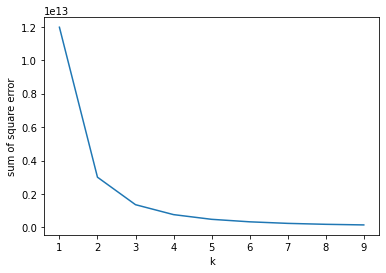

In [35]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng,sse)

In [36]:
# There are top 3 big clusters and lots of smaller.  May be hard to determine what the big clusters have in common.
data_encoded.cluster.value_counts()

2    898
3    865
0    836
1    824
Name: cluster, dtype: int64

In [37]:
data_encoded[data_encoded['cluster'] == 2]


,add_to_cart_order,reordered,product_name_Organic Egg Whites,product_name_Organic Free Range Grade A Large Brown Eggs,product_name_Organic Large Grade A Brown Eggs,product_name_Large Alfresco Eggs,product_name_Organic Grade A Free Range Large Brown Eggs,product_name_USDA AA Extra Large Eggs,product_name_Brown Extra Large Grade AA Eggs,product_name_Organic Extra Large Grade AA Brown Eggs,...,department_household,department_personal care,department_other,department_missing,department_bakery,department_pets,department_bulk,department_babies,department_alcohol,cluster
3,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1411,3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3592,11,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4582,11,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4605,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601720,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
602079,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
602990,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
603023,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


In [38]:

cluster_data = data_encoded.groupby('cluster').median()

In [39]:
cluster_data.head()

,add_to_cart_order,reordered,product_name_Organic Egg Whites,product_name_Organic Free Range Grade A Large Brown Eggs,product_name_Organic Large Grade A Brown Eggs,product_name_Large Alfresco Eggs,product_name_Organic Grade A Free Range Large Brown Eggs,product_name_USDA AA Extra Large Eggs,product_name_Brown Extra Large Grade AA Eggs,product_name_Organic Extra Large Grade AA Brown Eggs,...,department_canned goods,department_household,department_personal care,department_other,department_missing,department_bakery,department_pets,department_bulk,department_babies,department_alcohol
cluster,,,,,,,,,,,,,,,,,,,,,
0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data_encoded[data_encoded['cluster'] == 3]


,add_to_cart_order,reordered,product_name_Organic Egg Whites,product_name_Organic Free Range Grade A Large Brown Eggs,product_name_Organic Large Grade A Brown Eggs,product_name_Large Alfresco Eggs,product_name_Organic Grade A Free Range Large Brown Eggs,product_name_USDA AA Extra Large Eggs,product_name_Brown Extra Large Grade AA Eggs,product_name_Organic Extra Large Grade AA Brown Eggs,...,department_household,department_personal care,department_other,department_missing,department_bakery,department_pets,department_bulk,department_babies,department_alcohol,cluster
1763,6,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2607,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2679,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3431,24,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4138,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602186,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
602487,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
602725,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
603234,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3


https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad